# Model selection: choosing estimators and their parameters¶


## Score, and cross-validated scores

score evaluates the quality of fit (or the prediction) on new data.

In [1]:
from sklearn import datasets, svm
X_digits, y_digits = datasets.load_digits(return_X_y=True)
svc = svm.SVC(C=1, kernel='linear')
# Entrena el modelo con todos los datos menos los últimos 100, y evalúa en los últimos 100
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])


0.98

### KFold cross validation

A way to obtain a better measure of accuracy is to split the data in folds to subsequently train and test on each of these folds.

In [2]:
import numpy as np
X_folds = np.array_split(X_digits, 3) # Split the data into 3 (almost) equal parts
y_folds = np.array_split(y_digits, 3)
scores = list() # Initialize empty list

for k in range(3): # Por cada fold k
    X_train = list(X_folds) # Copia de la lista de folds
    X_test = X_train.pop(k) # Extrae el elemento en la posición 'k' actual y se usará como segmento prueba
    X_train = np.concatenate(X_train) # concatena los elementos restantes para formar el segmento de entrenamiento
    # Se repiten los pasos para las etiquetas
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    # Se entrena el modelo y se evalúa
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))  
print(scores)


[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


## Cross-validation generators
Tools that generate indices to efficiently split the data according to several cross-validation strategies.

### Split Method: 

Se utiliza un objeto KFold con K de 5, y se imprimen los índices para ver cómo se generan los splits para el training set de cada fold.

In [3]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c"]
k_fold = KFold(n_splits=5) # Create KFold object set to split into 5 groups. 
# This object creates index pairs which will be assigned in the next for loop

# for every group created by the KFold object, print the indices
for train_indices, test_indices in k_fold.split(X): 
    print("Train: %s | test: %s" % (train_indices, test_indices))

Train: [2 3 4 5 6 7 8 9] | test: [0 1]
Train: [0 1 4 5 6 7 8 9] | test: [2 3]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 3 4 5 8 9] | test: [6 7]
Train: [0 1 2 3 4 5 6 7] | test: [8 9]


Al aplicarlo al dataset digits:

se hace un for loop con k_fold split, asignando valores a los índices.  Después, en cada loop se dividen los datos de entrenamiento y prueba, se hace el fit y se guarda el score en la lista scores

In [4]:
k_fold = KFold(n_splits=5)
scores = []

for train_index, test_index in k_fold.split(X_digits):
    X_train, X_test = X_digits[train_index], X_digits[test_index]
    y_train, y_test = y_digits[train_index], y_digits[test_index]

    svc.fit(X_train, y_train)

    score = svc.score(X_test, y_test)
    scores.append(score)

print(scores)

[0.9638888888888889, 0.9222222222222223, 0.9637883008356546, 0.9637883008356546, 0.9303621169916435]


Ninja programmer:

In [5]:
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
 for train, test in k_fold.split(X_digits)]

[0.9638888888888889,
 0.9222222222222223,
 0.9637883008356546,
 0.9637883008356546,
 0.9303621169916435]

cross_val_score helper

recibe como argumentos un estimador (svc = SVC()), el dataset (X_digits, y_digits) y el cross-validation object (k_fold = KFold(n_splits=5). 

Hace lo mismo que lo escrito anteriormente, pero de forma más compacta y eficiente. Elimina la necesidad de bucles explícitos y permite el entrenamiento y evaluación en paralelo con n_jobs

Comento las líneas que ya fueron definidas antes.



In [6]:
# from sklearn.model_selection import cross_val_score
# from sklearn.svm import SVC
# from sklearn.model_selection import KFold

# # Preparar los datos de entrada y las etiquetas
# X_digits = # (asigna aquí tus datos de características)
# y_digits = # (asigna aquí tus etiquetas correspondientes)

# # Configurar la validación cruzada
# k_fold = KFold(n_splits=5)  # Dividir los datos en 5 partes

# # Crear una instancia del clasificador
# svc = SVC()

# Calcular los puntajes de validación cruzada
scores = cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

# Imprimir los puntajes obtenidos
print(scores)


[0.96388889 0.92222222 0.9637883  0.9637883  0.93036212]


El scoring argument puede editarse para cambiar la métrica de evaluación. Por defecto, el score es el accuracy.

In [7]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, scoring='precision_macro')

array([0.96578289, 0.92708922, 0.96681476, 0.96362897, 0.93192644])

#### Exercise

On the digits dataset, plot the cross-validation score of a SVC estimator with a linear kernel as a function of parameter C (use a logarithmic grid of points).

C:  1e-10
C:  1.2618568830660183e-10
C:  1.592282793341094e-10
C:  2.0092330025650458e-10
C:  2.5353644939701164e-10
C:  3.1992671377973845e-10
C:  4.03701725859655e-10
C:  5.094138014816385e-10
C:  6.428073117284319e-10
C:  8.111308307896856e-10
C:  1.0235310218990269e-09
C:  1.2915496650148826e-09
C:  1.6297508346206469e-09
C:  2.0565123083486515e-09
C:  2.595024211399732e-09
C:  3.2745491628777316e-09
C:  4.132012400115335e-09
C:  5.214008287999674e-09
C:  6.579332246575682e-09
C:  8.302175681319736e-09
C:  1.0476157527896662e-08
C:  1.3219411484660288e-08
C:  1.6681005372000592e-08
C:  2.104904144512022e-08
C:  2.656087782946684e-08
C:  3.351602650938841e-08
C:  4.229242874389499e-08
C:  5.336699231206302e-08
C:  6.734150657750828e-08
C:  8.497534359086438e-08
C:  1.0722672220103232e-07
C:  1.3530477745798075e-07
C:  1.7073526474706888e-07
C:  2.1544346900318867e-07
C:  2.71858824273294e-07
C:  3.4304692863149193e-07
C:  4.3287612810830616e-07
C:  5.462277217684337e-07
C:  6.892612

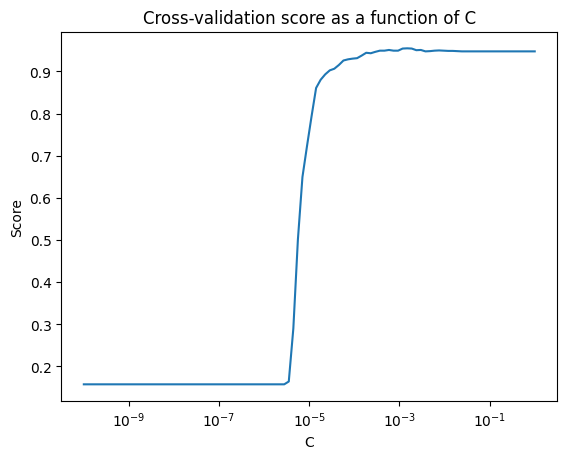

In [8]:
"""
On the digits dataset, plot the cross-validation score of a SVC estimator with a linear kernel 
as a function of parameter C (use a logarithmic grid of points)
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

# Load dataset
X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Define logspace range for C parameter
C_range = np.logspace(-10, -0, 100)  

# Initialize SVC estimator
svc = svm.SVC(kernel="linear")
# 
# For each value of C in the logspace range, calculate the cross-validation score with cross_val_score function
scores = []
for C in C_range:
    print("C: ", C)
    svc.C = C
    this_scores = cross_val_score(svc, X_digits, y_digits, n_jobs=-1)
    scores.append(np.mean(this_scores))

# Print the scores
print(scores)



# Plot the cross-validation scores as a function of C
plt.figure()
plt.xlabel("C")
plt.ylabel("Score")
plt.title("Cross-validation score as a function of C")
plt.plot(C_range, scores)
plt.xscale("log")
plt.show()




We can see the a sigmoid function where the accuracy quickly improves at C values between 10^-4.5 and 10^-5.5

## Grid search and cross-validated estimators

Grid-search is an object that, given data; computes the score during the fit of an estimator on a parameter grid and chooses the parameters that maximize the cross-validation score.

By default, GridSearchCV uses a 5-fold cross validation, and when it detects a classification problem it uses a stratified 5-fold

### Using GridSearch to find the best value for the parameter C

In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1) # specify the C parameter range for the svc estimator.
clf.fit(X_digits[:1000], y_digits[:1000])

#Print of the C's and results
for i in range(len(clf.cv_results_["mean_test_score"])):
    print(f"C = {Cs[i]:.6f}, Mean CV Score = {clf.cv_results_['mean_test_score'][i]:.6f}")

C = 0.000001, Mean CV Score = 0.104000
C = 0.000004, Mean CV Score = 0.104000
C = 0.000013, Mean CV Score = 0.627000
C = 0.000046, Mean CV Score = 0.879000
C = 0.000167, Mean CV Score = 0.932000
C = 0.000599, Mean CV Score = 0.937000
C = 0.002154, Mean CV Score = 0.950000
C = 0.007743, Mean CV Score = 0.945000
C = 0.027826, Mean CV Score = 0.946000
C = 0.100000, Mean CV Score = 0.946000


In [10]:
    clf.best_score_

0.95

In [11]:
clf.best_estimator_.C

0.0021544346900318843

In [12]:
clf.score(X_digits[1000:], y_digits[1000:])      


0.946047678795483

### Nested Cross Validation
When calling a cross_val_score on a GridSearchCV object, we are automatically searching for the optimal parameter and then using the best result for the cross validation of the whole model.

This approach ensures that the parameter tuning and model validation are robust and generalize well to new data.

In [14]:
cross_val_score(clf, X_digits, y_digits) 

array([0.94722222, 0.91666667, 0.96657382, 0.97493036, 0.93593315])

### Cross-validated estimators
Scikit learn determines parameters automatically for some estimators by cross-validation

In [19]:
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
X_diabetes, y_diabetes = datasets.load_diabetes(return_X_y=True)
lasso.fit(X_diabetes, y_diabetes)

LassoCV()

In [20]:
lasso.alpha_

0.003753767152691846

In [21]:
# print score for best alpha
lasso.score(X_diabetes, y_diabetes)


0.5174210668198782

## Exercise
On the diabetes dataset, find the optimal regularization parameter alpha

In [24]:
""" 
On the diabetes dataset, find the optimal regularization parameter alpha 
"""
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

# Load dataset
X_diabetes, y_diabetes = datasets.load_diabetes(return_X_y=True)
# Define the range of alpha values
alphas = np.logspace(-4, -0.5, 30)

# GridSearchCV object
lasso = linear_model.Lasso()
grid = GridSearchCV(estimator=lasso, param_grid=dict(alpha=alphas), n_jobs=-1)

# Fit the model
grid.fit(X_diabetes, y_diabetes)

# Print the alphas and the results
for i in range(len(grid.cv_results_["mean_test_score"])):
    print(f"Alpha = {alphas[i]:.6f}, Mean CV Score = {grid.cv_results_['mean_test_score'][i]:.6f}")

# Print the best alpha value
print("Best alpha: ", grid.best_estimator_.alpha)

# Correcciones:
# guardar los scores y la desviación estandar de los resultados
scores = grid.cv_results_["mean_test_score"]
scores_std = grid.cv_results_["std_test_score"]


Alpha = 0.000100, Mean CV Score = 0.482318
Alpha = 0.000132, Mean CV Score = 0.482319
Alpha = 0.000174, Mean CV Score = 0.482319
Alpha = 0.000230, Mean CV Score = 0.482319
Alpha = 0.000304, Mean CV Score = 0.482319
Alpha = 0.000401, Mean CV Score = 0.482319
Alpha = 0.000530, Mean CV Score = 0.482317
Alpha = 0.000700, Mean CV Score = 0.482312
Alpha = 0.000924, Mean CV Score = 0.482303
Alpha = 0.001220, Mean CV Score = 0.482362
Alpha = 0.001610, Mean CV Score = 0.482459
Alpha = 0.002126, Mean CV Score = 0.482479
Alpha = 0.002807, Mean CV Score = 0.482506
Alpha = 0.003707, Mean CV Score = 0.482530
Alpha = 0.004894, Mean CV Score = 0.482455
Alpha = 0.006462, Mean CV Score = 0.482010
Alpha = 0.008532, Mean CV Score = 0.481308
Alpha = 0.011265, Mean CV Score = 0.481158
Alpha = 0.014874, Mean CV Score = 0.481409
Alpha = 0.019638, Mean CV Score = 0.481752
Alpha = 0.025929, Mean CV Score = 0.481885
Alpha = 0.034236, Mean CV Score = 0.482099
Alpha = 0.045204, Mean CV Score = 0.482060
Alpha = 0.0

(0.0001, 0.31622776601683794)

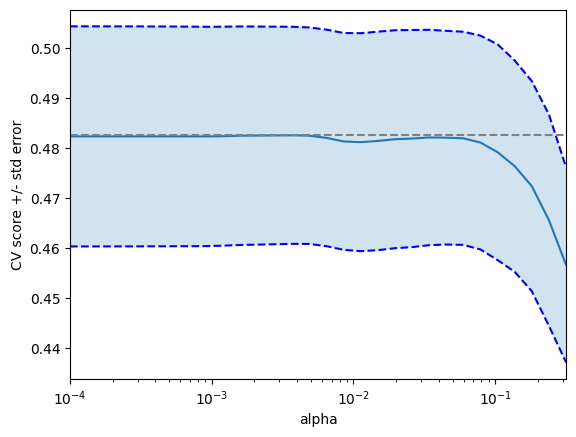

In [25]:
# Plot the results + error lines (std.errors of the scores)
plt.figure()
plt.semilogx(alphas, scores)

# Calcula el error estandar dividiendo la d.e. entre la raiz cuadrada del número de pliegues
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])


#### How much can we trust the selection of alpha?

In [27]:
# To answer this question we use the LassoCV object that sets its alpha
# parameter automatically from the data by internal cross-validation (i.e. it
# performs cross-validation on the training data it receives).
# We use external cross-validation to see how much the automatically obtained
# alphas differ across different cross-validation folds.
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold

lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
k_fold = KFold(3)

print("Answer to the bonus question:", "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print(
        "[fold {0}] alpha: {1:.5f}, score: {2:.5f}".format(
            k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])
        )
    )
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.05968, score: 0.54209
[fold 1] alpha: 0.04520, score: 0.15521
[fold 2] alpha: 0.07880, score: 0.45192

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.


Since the alpha varied for each subset, and more importantly, the scores varied more, the 'optimal' value of alpha varies significantly depending on the data subset. 

This sugests that the alpha parameter can't be trusted, and we should either:

    - Use more folds to reduce the variability

    - Use more or different parameters

    - use other regularization techniques such as Ridge or "Elastic Net"

    - Nested cross-validation

    - model ensemble, train multiple models and average their predictions
    
    - Evaluation based in multiple scoring techniques